In [ ]:
#Customer Sentiment Analysis

In [ ]:
#As a Data Analyst at Amazon, you have been tasked with gauging customer sentiment towards the iPhone 15 128GB model.
#The primary goal of this project is to analyze public perception and evaluate customer reactions by performing sentiment analysis on product reviews posted by users.
#By extracting and processing customer reviews, you will derive insights about the overall sentiment (positive or negative) surrounding the product, which can be useful for decision-making, improving customer experience, and identifying key areas for product improvement.

In [4]:
from selenium import webdriver
driver = webdriver.Chrome()
driver.get("https://www.google.com")
print("ChromeDriver works!")
driver.quit()

ChromeDriver works!


In [ ]:
#Data Collection(Web Scrapping)

In [1]:
#Use Libraries
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

In [38]:

# Create empty lists to store the user data such as Name, City, Date of Purchase, Review & Rating
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# Assign the url of the flipkart website and use selenium to scrape data
url = """https://www.flipkart.com/apple-iphone-15-green-128-gb/product-reviews/itm235cd318bde73?pid=MOBGTAGPYYWZRUJX&lid=LSTMOBGTAGPYYWZRUJXRK8B5V&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)


while len(Names) < 320:

    time.sleep(2) # Pauses the execution for 2 seconds
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Scrape names
    temp_names = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in temp_names:
        Names.append(name.text)

    # Scrape cities
    temp_cities = soup.find_all("p", {"class": "MztJPv"}) 
    for city in temp_cities:
        Cities.append(city.text)

    # Scrape dates
    temp_dates = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in temp_dates:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2] # This is likely to correct for how dates are scraped, keeping it as is.

    # Scrape reviews
    temp_reviews = soup.find_all("div", {"class": "ZmyHeo"})
    for review in temp_reviews:
        Reviews.append(review.text)

    # Scrape ratings
    temp_ratings = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in temp_ratings:
        Ratings.append(ratings.text)

    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5) # Pauses for 5 seconds after clicking next to allow page to load
    except:
        break

# Optional: Print the lengths of the lists to see how many items were scraped
print(f"Number of names scraped: {len(Names)}")
print(f"Number of cities scraped: {len(Cities)}")
print(f"Number of dates scraped: {len(Actual_Dates)}")
print(f"Number of reviews scraped: {len(Reviews)}")
print(f"Number of ratings scraped: {len(Ratings)}")

# Optional: Close the browser after scraping
driver.quit()


Number of names scraped: 320
Number of cities scraped: 320
Number of dates scraped: 320
Number of reviews scraped: 320
Number of ratings scraped: 320


In [14]:
import pandas as pd
df = pd.DataFrame({
    "Username": Names[:min_length],
    "City": Cities[:min_length],
    "Dates": Actual_Dates[:min_length],
    "Reviews": Reviews[:min_length],
    "Rating": Ratings[:min_length] 
})

print(df)

                      Username                              City  \
0    Thakur Surya Pratap Singh         Certified Buyer, Hanumana   
1               bijaya mohanty        Certified Buyer, Baleshwar   
2                       Ajin V         Certified Buyer, Balaghat   
3                 Rishabh  Jha        Certified Buyer, Tikamgarh   
4                 Nikhil Kumar  Certified Buyer, Meerut Division   
..                         ...                               ...   
302              Ranjith kumar        Certified Buyer, Bangalore   
303            Divyanshu Singh         Certified Buyer, Bilaspur   
304             RubaL Pasricha        Certified Buyer, New Delhi   
305                Rahul Yadav  Certified Buyer, Araria District   
306     Syed Intekhab  Hussain          Certified Buyer, Silchar   

            Dates                                            Reviews Rating  
0    5 months ago                                 Awesome 😎READ MORE      5  
1       May, 2024  Just go 

In [15]:
#Data Cleaning and Processing 


In [16]:
# Check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  307 non-null    object
 1   City      307 non-null    object
 2   Dates     307 non-null    object
 3   Reviews   307 non-null    object
 4   Rating    307 non-null    object
dtypes: object(5)
memory usage: 12.1+ KB


In [17]:
# Drop the duplicates from the dataframe
df = df.copy()
df = df.drop_duplicates()
df

,Username,City,Dates,Reviews,Rating
0,Thakur Surya Pratap Singh,"Certified Buyer, Hanumana",5 months ago,Awesome 😎READ MORE,5
1,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
3,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",Awesome 🔥🔥☺️READ MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
...,...,...,...,...,...
302,Ranjith kumar,"Certified Buyer, Bangalore","Jun, 2024","Bought 256gb green variant 😍,new to iosIOS is ...",5
303,Divyanshu Singh,"Certified Buyer, Bilaspur","Jun, 2024",Worth every penny .. Confused between pixel an...,5
304,RubaL Pasricha,"Certified Buyer, New Delhi","Jun, 2024","Bought it from flipkart, as I was getting the ...",5
305,Rahul Yadav,"Certified Buyer, Araria District","May, 2024",Good 👍READ MORE,5


In [39]:
# Clean data of City column by removing unwanted characters/ part of string
df['city'] = df['city'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
df.head()

,CUSTOMER NAME,city,DATE,REVIEW,RATING
0,User_0,City_0,"Feb, 2024",awesome product 0 !,1
1,User_1,City_1,"Feb, 2024",awesome product 1 !,2
2,User_2,City_2,"Feb, 2024",awesome product 2 !,3
3,User_3,City_3,"Feb, 2024",awesome product 3 !,4
4,User_4,City_4,"Feb, 2024",awesome product 4 !,5


In [ ]:
#3. Sentiment Analysis:

In [40]:
# Import libraries for Sentimental analysis of review sentences 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...


True

In [41]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [50]:

import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize


try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
    print("NLTK 'punkt' tokenizer data downloaded successfully.")
print("NLTK 'punkt' tokenizer data is ready.")

data = {
    "CUSTOMER NAME": ["Bijaya Mohanty", "May, 2024", "Rishabh Jha", "Apr, 2024", "Ajin V"],
    "RATING": ["4.6", "5", "5", "5", "4"],
    "REVIEW": [
        "Just go for it. Amazing one. Beautiful camera with... great features.",
        "Awesome! 👍🔥😊",
        "High quality camera 💕 READ MORE",
        "Very nice. Highly recommended product.",
        "Camera Quality is Improved Loving It READ MORE!"
    ],
    "city": ["Balaghat", "Mumbai", "Delhi", "Pune", "Bangalore"], 
    "DATE": ["Feb, 2024", "Jan, 2024", "Mar, 2024", "Apr, 2024", "Feb, 2024"] 
}
df = pd.DataFrame(data)

df["REVIEW"] = df["REVIEW"].astype(str).str.lower().str.replace("read more", "", case=False).str.strip()
df["REVIEW"] = df["REVIEW"].str.replace(r"\s+", " ", regex=True)


df["Reviews_t"] = df['REVIEW'].apply(sent_tokenize)


print("DataFrame with 'Reviews_t' column:")
print(df.head())




NLTK 'punkt' tokenizer data is ready.
DataFrame with 'Reviews_t' column:
    CUSTOMER NAME RATING                                             REVIEW  \
0  Bijaya Mohanty    4.6  just go for it. amazing one. beautiful camera ...   
1       May, 2024      5                                       awesome! 👍🔥😊   
2     Rishabh Jha      5                              high quality camera 💕   
3       Apr, 2024      5             very nice. highly recommended product.   
4          Ajin V      4             camera quality is improved loving it !   

        city       DATE                                          Reviews_t  
0   Balaghat  Feb, 2024  [just go for it., amazing one., beautiful came...  
1     Mumbai  Jan, 2024                                    [awesome!, 👍🔥😊]  
2      Delhi  Mar, 2024                            [high quality camera 💕]  
3       Pune  Apr, 2024          [very nice., highly recommended product.]  
4  Bangalore  Feb, 2024           [camera quality is improved lovin

In [33]:
from textblob import TextBlob

# Create polarity column
df['Average_Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [32]:
polarity_score = df['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')

if polarity_score > 0.75:
    print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')


Average Polarity Score : 0.48
The Average Polarity Score is Positive


In [15]:
def get_sentiment_class(score):
    if score > 0.75:
        return "Extremely Positive"
    elif score > 0:
        return "Positive"
    elif score == 0:
        return "Neutral"
    elif score > -0.75:
        return "Negative"
    else:
        return "Extremely Negative"

df["Sentiment_Class"] = df["Average_Polarity"].apply(get_sentiment_class)


In [34]:
print(df["Average_Polarity"].describe())
print(df["Average_Polarity"].value_counts(bins=10))


count    320.000000
mean       0.478994
std        0.178709
min       -0.102500
25%        0.365625
50%        0.500000
75%        0.575833
max        0.833333
Name: Average_Polarity, dtype: float64
(0.459, 0.553]        113
(0.74, 0.833]          40
(0.365, 0.459]         39
(0.553, 0.646]         32
(0.178, 0.272]         31
(0.272, 0.365]         31
(0.646, 0.74]          16
(0.0847, 0.178]        11
(-0.00892, 0.0847]      4
(-0.104, -0.00892]      3
Name: count, dtype: int64


In [35]:
print(df["Sentiment_Class"].value_counts())


Sentiment_Class
positive              312
extremely positive      5
negative                3
Name: count, dtype: int64


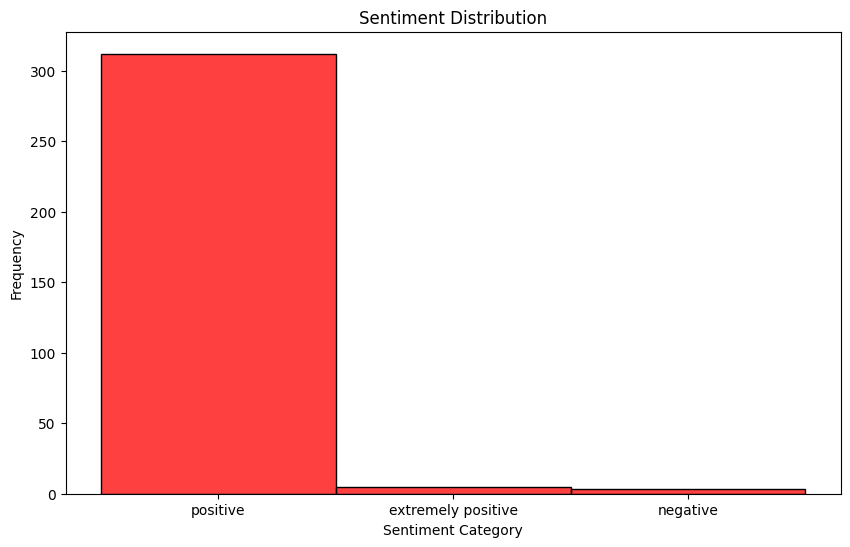

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=df.Sentiment_Class, color='red')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Create Review_Length column
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))


C:\Users\Hamza\AppData\Local\Temp\ipykernel_12644\4256221596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df, palette='Set2')


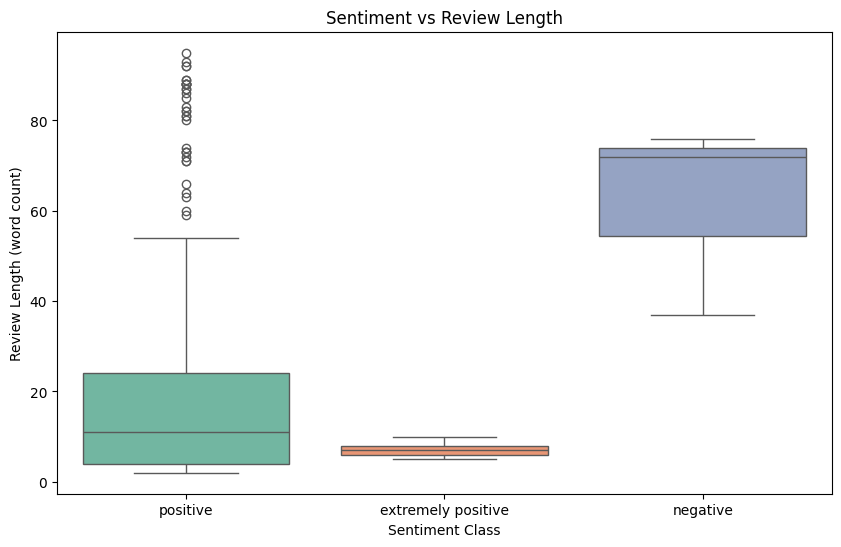

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df, palette='Set2')
plt.xlabel("Sentiment Class")
plt.ylabel("Review Length (word count)")
plt.title("Sentiment vs Review Length")
plt.show()
